# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key  

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [36]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [37]:

# Pull weather data for each city using API calls.

weather_data=[]
base_url = "http://api.openweathermap.org/data/2.5/weather?"


for i in range(len(cities)):
    params={ "q":cities[i],
             "APPID": api_key}
    response = requests.get(base_url, params=params)
    weather_json = response.json()
    weather_data.append(weather_json)
    
  


In [38]:
# Check one weather_data
weather_data[1]

{'coord': {'lon': -122.43, 'lat': 37.46},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 285.22,
  'pressure': 1015,
  'humidity': 82,
  'temp_min': 283.15,
  'temp_max': 287.15},
 'visibility': 14484,
 'wind': {'speed': 2.1, 'deg': 250},
 'clouds': {'all': 90},
 'dt': 1554275207,
 'sys': {'type': 1,
  'id': 4322,
  'message': 0.0086,
  'country': 'US',
  'sunrise': 1554299532,
  'sunset': 1554345207},
 'id': 5354943,
 'name': 'Half Moon Bay',
 'cod': 200}

In [39]:

# Store the non-null weather data in a new list 'weather_data_2' and print log of each city 

print('Beginning Data Retrieval')
print('------------------------')
weather_data_2=[]

i=0
iter_count=1
city_count=1
set=1
while i < len(weather_data):
    try:
        weather_data[i]['name'] == cities[i]
    except:
        print('City not found. Skipping...')
    else:
        weather_data_2.append(weather_data[i])
        print(f'Processing Record {city_count} of Set {set} | {cities[i]}')
        iter_count += 1
        city_count += 1
        if iter_count == 51:
            set += 1
            iter_count = 1
            city_count = 0
    i += 1

print('------------------------')
print('Data Retrieval Complete')
print('------------------------')
        


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | gravdal
Processing Record 2 of Set 1 | half moon bay
Processing Record 3 of Set 1 | kruisfontein
Processing Record 4 of Set 1 | encruzilhada do sul
Processing Record 5 of Set 1 | verkhnyaya inta
Processing Record 6 of Set 1 | castro
Processing Record 7 of Set 1 | olinda
Processing Record 8 of Set 1 | port augusta
Processing Record 9 of Set 1 | solon
Processing Record 10 of Set 1 | mehamn
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | cape town
Processing Record 14 of Set 1 | svetlogorsk
Processing Record 15 of Set 1 | taoudenni
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | jamestown
City not found. Skipping...
Processing Record 18 of Set 1 | balsas
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | mahebourg
Processing Record 21 of Set 1 | constantine
Processing Record 22 of Set 1 | t

In [40]:
valid_len = len(weather_data_2)
print(f'We get {valid_len} valid weather data from {len(cities)} cities' )

We get 542 valid weather data from 611 cities


In [4]:
# Export the raw weather data as dataframe and display the first five rows
raw_weather_df = pd.DataFrame(weather_data_2)
raw_weather_df.head()

NameError: name 'weather_data_2' is not defined

### Convert Raw Data to DataFrame

* Display the DataFrame

In [43]:
# Retrive column we needed from raw_weather_df and store them in a new dateframe
weather_df = raw_weather_df[['name','dt','coord','clouds','sys','main','wind']]
weather_df.head()


,name,dt,coord,clouds,sys,main,wind
0,Gravdal,1554275106,"{'lon': 5.78, 'lat': 59.79}",{'all': 75},"{'type': 1, 'id': 1677, 'message': 0.0052, 'co...","{'temp': 279.76, 'pressure': 1003, 'humidity':...","{'speed': 7.7, 'deg': 90}"
1,Half Moon Bay,1554275207,"{'lon': -122.43, 'lat': 37.46}",{'all': 90},"{'type': 1, 'id': 4322, 'message': 0.0086, 'co...","{'temp': 285.22, 'pressure': 1015, 'humidity':...","{'speed': 2.1, 'deg': 250}"
2,Kruisfontein,1554275213,"{'lon': 24.73, 'lat': -34}",{'all': 56},"{'message': 0.0033, 'country': 'ZA', 'sunrise'...","{'temp': 288.914, 'pressure': 1014.68, 'humidi...","{'speed': 5.12, 'deg': 66.0087}"
3,Encruzilhada do Sul,1554274958,"{'lon': -52.52, 'lat': -30.54}",{'all': 48},"{'message': 0.004, 'country': 'BR', 'sunrise':...","{'temp': 292.514, 'pressure': 1010.96, 'humidi...","{'speed': 2.27, 'deg': 336.509}"
4,Verkhnyaya Inta,1554275213,"{'lon': 60.32, 'lat': 65.99}",{'all': 80},"{'message': 0.0038, 'country': 'RU', 'sunrise'...","{'temp': 272.164, 'pressure': 1017.6, 'humidit...","{'speed': 4.42, 'deg': 254.509}"


In [44]:
# Cheak if null values exsiting in the dataset
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 7 columns):
name      542 non-null object
dt        542 non-null int64
coord     542 non-null object
clouds    542 non-null object
sys       542 non-null object
main      542 non-null object
wind      542 non-null object
dtypes: int64(1), object(6)
memory usage: 29.7+ KB


In [45]:
# Check if duplicated rows existing
weather_df['name'].nunique()

542

In [46]:
# rename columns
weather_df = weather_df.rename(columns={'name':'City','dt':'Date'})
# Check the change
weather_df.head()


,City,Date,coord,clouds,sys,main,wind
0,Gravdal,1554275106,"{'lon': 5.78, 'lat': 59.79}",{'all': 75},"{'type': 1, 'id': 1677, 'message': 0.0052, 'co...","{'temp': 279.76, 'pressure': 1003, 'humidity':...","{'speed': 7.7, 'deg': 90}"
1,Half Moon Bay,1554275207,"{'lon': -122.43, 'lat': 37.46}",{'all': 90},"{'type': 1, 'id': 4322, 'message': 0.0086, 'co...","{'temp': 285.22, 'pressure': 1015, 'humidity':...","{'speed': 2.1, 'deg': 250}"
2,Kruisfontein,1554275213,"{'lon': 24.73, 'lat': -34}",{'all': 56},"{'message': 0.0033, 'country': 'ZA', 'sunrise'...","{'temp': 288.914, 'pressure': 1014.68, 'humidi...","{'speed': 5.12, 'deg': 66.0087}"
3,Encruzilhada do Sul,1554274958,"{'lon': -52.52, 'lat': -30.54}",{'all': 48},"{'message': 0.004, 'country': 'BR', 'sunrise':...","{'temp': 292.514, 'pressure': 1010.96, 'humidi...","{'speed': 2.27, 'deg': 336.509}"
4,Verkhnyaya Inta,1554275213,"{'lon': 60.32, 'lat': 65.99}",{'all': 80},"{'message': 0.0038, 'country': 'RU', 'sunrise'...","{'temp': 272.164, 'pressure': 1017.6, 'humidit...","{'speed': 4.42, 'deg': 254.509}"


In [47]:
# Add columns for Cloudiness, Country, Humidity, Lat, Lng, Max Temp, Wind Speed, and retrive value from the raw dateframe
weather_df['Cloudiness'] = weather_df['clouds'].apply(lambda x: x['all'])  
weather_df['Country'] = weather_df['sys'].apply(lambda x: x['country'])
weather_df['Humidity'] = weather_df['main'].apply(lambda x: x['humidity'])
weather_df['Lat'] = weather_df['coord'].apply(lambda x: x['lat'])
weather_df['Lng'] = weather_df['coord'].apply(lambda x: x['lon'])
weather_df['Max Temp']= weather_df['main'].apply(lambda x: x['temp_max'])
weather_df['Wind Speed']= weather_df['wind'].apply(lambda x: x['speed'])

In [48]:
# Convert Kelvin to Fahrenheit for Max Temp column
# (0K − 273.15) × 9/5 + 32 = -459.7°F
weather_df['Max Temp'] = (weather_df['Max Temp']-273.15)* 9/5 +32


In [49]:
# Convert wind speed m/s to mph:1 m/s= 2.23694 mph
weather_df['Wind Speed'] = round(weather_df['Wind Speed']*2.23694,2)

In [50]:
# Reorganize the columns and remove unwanted columns
weather_df = weather_df[['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Gravdal,75,NO,1554275106,70,59.79,5.78,46.4000,17.22
1,Half Moon Bay,90,US,1554275207,82,37.46,-122.43,57.2000,4.70
2,Kruisfontein,56,ZA,1554275213,77,-34.00,24.73,60.3752,11.45
3,Encruzilhada do Sul,48,BR,1554274958,94,-30.54,-52.52,66.8552,5.08
4,Verkhnyaya Inta,80,RU,1554275213,68,65.99,60.32,30.2252,9.89


In [51]:
# Export the city data into a .csv.


weather_df.to_csv(output_data_file,index=False)

In [12]:
# Import csv file we saved as dataframe 
weather_df = pd.read_csv("output_data/cities.csv")

In [13]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 9 columns):
City          542 non-null object
Cloudiness    542 non-null int64
Country       538 non-null object
Date          542 non-null int64
Humidity      542 non-null int64
Lat           542 non-null float64
Lng           542 non-null float64
Max Temp      542 non-null float64
Wind Speed    542 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.2+ KB


In [14]:
# Find the earliest and latest time the weather data recorded 
# Convert Epoch & Unix Timestamp to local readable date
# Resource https://www.epochconverter.com/
print(f"The earlieat date in our dataset is {weather_df['Date'].min()}(04/03/2019 0:30:00).")
print(f"The latest date in our dataset is {weather_df['Date'].max()}(04/03/2019 2:09:00).")
  

The earlieat date in our dataset is 1554269400(04/03/2019 0:30:00).
The latest date in our dataset is 1554275340(04/03/2019 2:09:00).


In [15]:

Period = int((weather_df['Date'].max()-weather_df['Date'].min())/60)

print(f'All the weather data in our dataset recorded are within {Period} mins')

All the weather data in our dataset recorded are within 99 mins


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

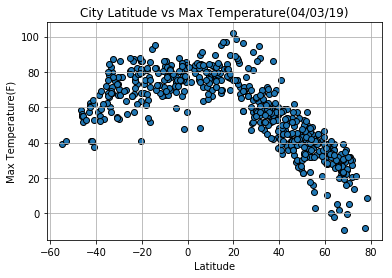

In [41]:
# Generate the scatterplot to explore the corelation of latitude and temperature
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],marker="o", edgecolors="black")

# Create the title,xlabel,ylabel
plt.title('City Latitude vs Max Temperature(04/03/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')

# Set limits on x and y axes
#plt.xlim(-62,84)
plt.ylim(-15,108)

# Create grid
plt.grid()


# Save the plot
plt.savefig('output_data\maxTemp.png')


In [42]:
# Find the highest temperature and the latitude location with the highest temperature 
max_tem = weather_df["Max Temp"].max()
location_maxtem = weather_df[weather_df["Max Temp"]==max_tem]["Lat"].values[0]

print(f'The highest temperature recorded is {max_tem}F located on latitude {location_maxtem}.')

The highest temperature recorded is 101.7752F located on latitude 19.59.


In [43]:
# Find the lowest temperature and the latitude location with the lowest temperature 
min_tem = weather_df["Max Temp"].min()
location_mintem = weather_df[weather_df["Max Temp"]==min_tem]["Lat"].values[0]

print(f'The lowest temperature recorded is {min_tem}F located on latitude {location_mintem}.')

The lowest temperature recorded is -9.399999999999947F located on latitude 68.22.


In [44]:
# the latitude region where Max Temp greater than 90F
weather_df[weather_df["Max Temp"]>90]['Lat'].describe()

count    11.000000
mean     13.422727
std      15.695750
min     -15.770000
25%      10.440000
50%      16.730000
75%      22.795000
max      31.180000
Name: Lat, dtype: float64

In [45]:
# Divide the world into different regions along the lantitude
bin_edges =[-60,-36,-12,12,36,60,84]
bin_names = ["-60 to -36", "-36 to -12", "-12 to 12", "12 to 36",'36 to 60','60 to 84']
weather_df['Region'] = pd.cut(weather_df['Lat'], bin_edges, labels=bin_names)

# the average of cities Max Temp  in each region
weather_df.groupby('Region')["Max Temp"].mean()

Region
-60 to -36    54.736000
-36 to -12    73.069652
-12 to 12     76.683042
12 to 36      70.217394
36 to 60      43.353576
60 to 84      25.599545
Name: Max Temp, dtype: float64

#### Latitude vs. Humidity Plot

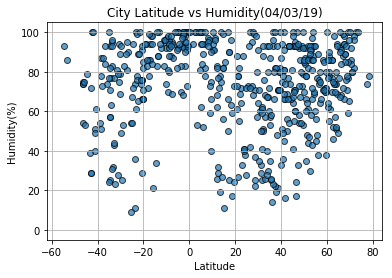

In [46]:
# Generate the scatterplot to explore the corelation of latitude and humidity
plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker='o',edgecolors="black",alpha=0.7)

# Create the title,xlabel,ylabel
plt.title("City Latitude vs Humidity(04/03/19)")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# Set limits on x and y axes
plt.xlim(-62,84)
plt.ylim(-5,105)

# Set the grid
plt.grid()

# Save the plot
plt.savefig('output_data\Humidity.png')

In [47]:
# Divide the world into different regions along the lantitude
bin_edges =[-60,-36,-12,12,36,60,84]
bin_names = ["-60 to -36", "-36 to -12", "-12 to 12", "12 to 36",'36 to 60','60 to 84']
weather_df['Region'] = pd.cut(weather_df['Lat'], bin_edges, labels=bin_names)

# the average of cities humidity  in each region
weather_df.groupby('Region')['Humidity'].mean()

Region
-60 to -36    68.148148
-36 to -12    73.053763
-12 to 12     88.901099
12 to 36      61.238095
36 to 60      71.542484
60 to 84      80.095890
Name: Humidity, dtype: float64

In [48]:
# The distribution of Humidity values
weather_df['Humidity'].describe()

count    542.000000
mean      73.702952
std       22.100726
min        9.000000
25%       61.250000
50%       78.000000
75%       93.000000
max      100.000000
Name: Humidity, dtype: float64

#### Latitude vs. Cloudiness Plot

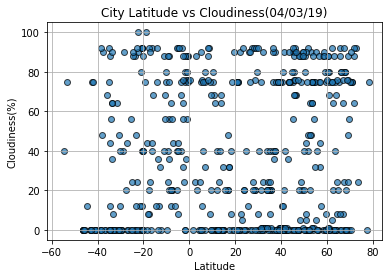

In [49]:
# Generate the scatterplot to explore the corelation of latitude and cloudiness
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], marker='o',edgecolors="black",alpha=0.7)

# Set limits on x and y axes
plt.xlim(-62,84)
plt.ylim(-5,105)

# Set grid
plt.grid()

# Create the title,xlabel,ylabel
plt.title("City Latitude vs Cloudiness(04/03/19)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Save the plot
plt.savefig('output_data\Cloudiness.png')

#### Latitude vs. Wind Speed Plot

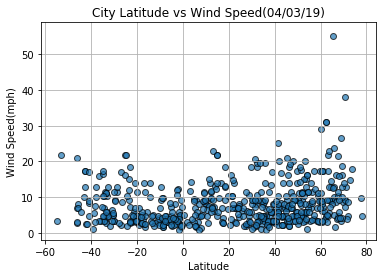

In [50]:
# Generate the scatterplot to explore the corelation of latitude and Wind Speed
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], marker='o',edgecolors="black",alpha=0.7)

# Set limits on x and y axes
plt.xlim(-62,84)
plt.ylim(-2,59)

# Create the title,xlabel,ylabel
plt.title("City Latitude vs Wind Speed(04/03/19)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')

# Set grid
plt.grid()

# Save the plot
plt.savefig("output_data\Wind Speed.png")

In [51]:
# The proportion of Wind Speed no more 20mph
(weather_df['Wind Speed']<20).mean()

0.9575645756457565

In [52]:
# Divide the world into different regions along the lantitude
bin_edges =[-60,-36,-12,12,36,60,84]
bin_names = ["-60 to -36", "-36 to -12", "-12 to 12", "12 to 36",'36 to 60','60 to 84']
weather_df['Region'] = pd.cut(weather_df['Lat'], bin_edges, labels=bin_names)

# Count the cities in each cloud cover types
weather_df.groupby('Region')['Wind Speed'].mean()

Region
-60 to -36     8.900741
-36 to -12     6.997849
-12 to 12      5.517912
12 to 36       8.230571
36 to 60       7.899542
60 to 84      11.916986
Name: Wind Speed, dtype: float64

# DESCRIPTION OF OBSERVATIONS

In this project, we collected the weather data of 542 cities across the world of varying distance from the equator, to explore the corelation of lantitude and the following weahter varibles:Max Temperature, Humidity, Cloudiness and Wind Speed.
The weather data are collected with 99 mins(from 04/03/2019 0:30:00 to 04/03/2019 2:09:00). 
We divide the world into 6 region along lantitude(-60 to -36, -36 to -12, -12 to 12, 12 to 36,36 to 60, 60 to 84)

1.latitide vs max temperature

We can the equator region (latitude from -12 to 12) has highest average temperature(88.9F), further away the equator the regions are, lower the average temperature they got. The coldest region is located at lantitude from 60 to 84(25.6F). The highest temperature recorded is 101.8F located on latitude 19.59.The lowest temperature recorded is -9.40F located on latitude 68.22.


2.latitide vs humididy

Wind Speed doesn't seem to have much correlation to latitude. 75% latitudes have humidity percentage ranging from 61% to 100%. The cities on or very near the equator(latitude from -12 to 12) have highest average humidity (88.90%)


3.latitide vs Wind Speed

No significant correlation was found between latitude and Wind Speed. 95% Wind Speed varied from 0-20mph. the equator region (latitude from -12 to 12) has the smallest average speed(5.51mph), the region(latitude from 60 to 84) got the bigest speed(11.9mph)


Conclusion: the equator region(latitude from -12 to 12) is a area with the highest average temperature, the highest humidity and the smallest windspeed.
The region (latitude from 60 to 84),far away the equator region, on the contrary is the coldest region with the strongest wind power.
